# Support Vector Machines

En este ejercicio iremos viendo como podemos emplear las técnicas aprendidas anteriormente en ejercicios de clasificación. Nos interesa ver cómo de difícil se lo podemos poner a los SVMs.

In [1]:
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


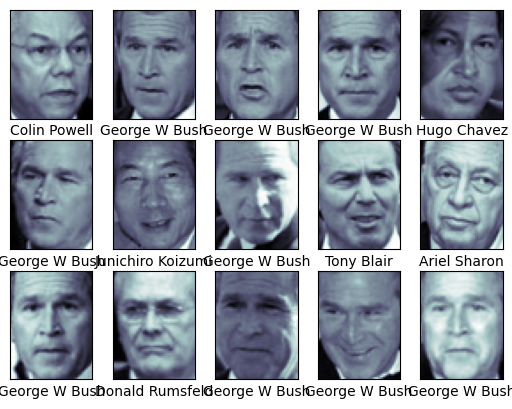

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

Como vemos se trata de caras de personas públicas de la esfera política. Buscaremos un buen estimador para ver si acertamos a automatizar la identificación de caras.

In [3]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

pca = StandardScaler()
svc = SVC(kernel='linear', class_weight='balanced')
model = make_pipeline(pca, svc)

In [4]:
pca

StandardScaler()

In [5]:
svc

SVC(class_weight='balanced', kernel='linear')

In [6]:
model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(class_weight='balanced', kernel='linear'))])

Hemos construido un pipeline, una cadena de tareas que se dan en secuencia. De este modo siempre escalaremos los datos antes de enviarlos a nuestro modelo. Ahora debemos buscar un separación para entrenamiento y validación.

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

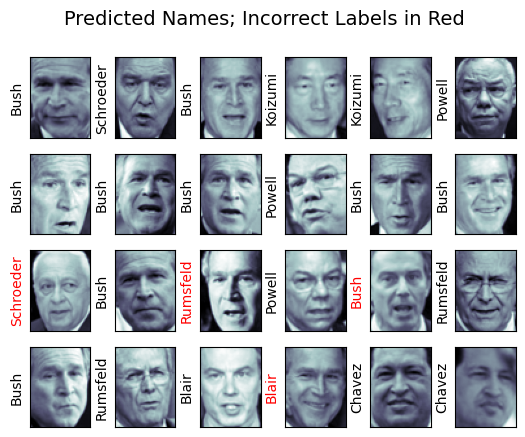

In [7]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

model.fit(Xtrain, ytrain)

yfit = model.predict(Xtest)

fig, ax = plt.subplots(4, 6)

for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])

    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')

fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)


Y definir una serie de valores sobre los que variar los parámetros del modelo.

In [44]:
from sklearn.model_selection import GridSearchCV

# Variad entre varios parámetros
param_grid = {'svc__C': [0.0043, 0.0044, 0.0045],
              'svc__gamma': [1e-14, 1e-13, 1e-12]}

grid = GridSearchCV(model, param_grid)

In [45]:
%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

CPU times: total: 9.59 s
Wall time: 26.8 s
{'svc__C': 0.0044, 'svc__gamma': 1e-14}


In [46]:
model = grid.best_estimator_

yfit = model.predict(Xtest)

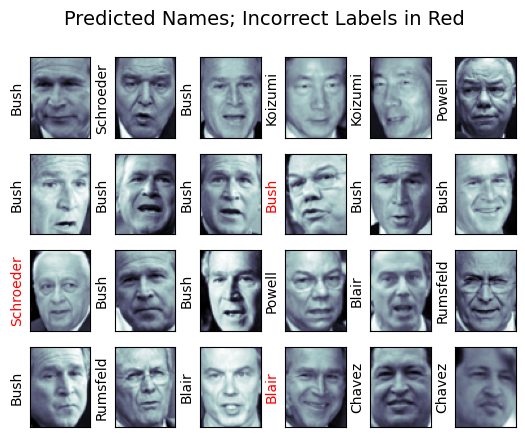

In [47]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [48]:
from sklearn.metrics import classification_report

print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.69      0.73      0.71        15
     Colin Powell       0.82      0.87      0.84        68
  Donald Rumsfeld       0.77      0.77      0.77        31
    George W Bush       0.92      0.87      0.89       126
Gerhard Schroeder       0.71      0.87      0.78        23
      Hugo Chavez       1.00      0.65      0.79        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.84      0.90      0.87        42

         accuracy                           0.85       337
        macro avg       0.83      0.83      0.82       337
     weighted avg       0.86      0.85      0.85       337



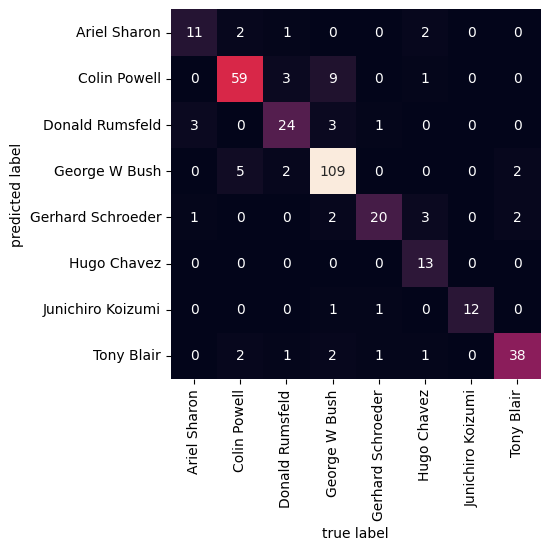

In [49]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

Probad variando el tipo de kernel, valores del grid search... a ver hasta dónde llegamos.